In [55]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import matplotlib.pyplot as plt
import os
import statsmodels as sm
import math
from statistics import mean 

In [56]:
from days_around_events import days_around_events
from ETS import model, fit_extracter, forecasting
from Initialisation import Initial_Parameter_calculater
from Optimizer import model_optimization

In [57]:
#Importing evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [58]:
#setting working directory
os.chdir("C:/Users/mah/Desktop/M5_Wallmart_Challenge")
os.getcwd()

#reading in the exogen variables which are the SNAP, Sporting, Cultural, National and Religious events
exogen = pd.read_csv("exogen_variables.csv", index_col='date')

In [59]:
before=[0,0,0,0,0]
after=[0,0,0,0,0]

In [60]:
#Include days before and after events into the exogen data set
exogen = days_around_events(exogen, before, after)

In [61]:
data = pd.read_csv("Revenue_Store_Category.csv")
data = pd.DataFrame(data)

In [67]:
#Define training and prediction data sets for the exogen variables
exog_to_train = exogen.iloc[:(len(data)-31)]
exog_to_test = exogen.iloc[len(data)-31:]

In [68]:
#check how many columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1913 entries, 0 to 1912
Data columns (total 31 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            1913 non-null   object 
 1   CA_1_HOBBIES    1913 non-null   float64
 2   CA_1_HOUSEHOLD  1913 non-null   float64
 3   CA_1_FOODS      1913 non-null   float64
 4   CA_2_HOBBIES    1913 non-null   float64
 5   CA_2_HOUSEHOLD  1913 non-null   float64
 6   CA_2_FOODS      1913 non-null   float64
 7   CA_3_HOBBIES    1913 non-null   float64
 8   CA_3_HOUSEHOLD  1913 non-null   float64
 9   CA_3_FOODS      1913 non-null   float64
 10  CA_4_HOBBIES    1913 non-null   float64
 11  CA_4_HOUSEHOLD  1913 non-null   float64
 12  CA_4_FOODS      1913 non-null   float64
 13  TX_1_HOBBIES    1913 non-null   float64
 14  TX_1_HOUSEHOLD  1913 non-null   float64
 15  TX_1_FOODS      1913 non-null   float64
 16  TX_2_HOBBIES    1913 non-null   float64
 17  TX_2_HOUSEHOLD  1913 non-null   f

In [78]:
Optimal_Parameters = {'1': [ 8.28772801e-02,  1.00000000e-06,  1.00000000e-06,  9.99900000e-01,
          9.32285791e+02,  3.00938004e+00,  1.40184833e+00,  1.32193141e+00,
          1.05916303e+00,  9.58923845e-01,  9.51769248e-01,  9.73350948e-01,
          1.14057097e+00,  4.36378073e-02, -5.93421785e-02, -9.14167167e-02,
         -5.68305306e-02,  8.90162445e-03],
 '2': [ 9.65907934e-02,  1.00000000e-06,  1.00000000e-06,  9.20754260e-01,
          1.84712087e+03,  5.29615124e-03,  1.29989409e+00,  1.37102452e+00,
          9.53638659e-01,  8.17741582e-01,  7.83647141e-01,  7.98088446e-01,
          9.70808844e-01,  5.68866141e-02, -8.37731319e-02, -1.66956557e-01,
          4.14039046e-02,  7.40078959e-05],
 '3': [ 2.22496303e-01,  1.34032053e-04,  1.70334204e-02,  9.99900000e-01,
          5.26234830e+03,  5.39910247e-02,  1.27839968e+00,  1.31656682e+00,
          9.55962644e-01,  8.40174883e-01,  8.06660618e-01,  8.35412799e-01,
          1.02007387e+00,  1.31456887e-01, -5.47092247e-02, -1.52326618e-01,
          1.51412755e-02,  1.31879973e-02],
 '4': [ 5.22833197e-02,  7.02885392e-05,  1.00000000e-06,  9.99900000e-01,
          8.31385588e+02,  5.82247016e-02,  1.35527385e+00,  1.24856597e+00,
          9.41554888e-01,  8.86761724e-01,  8.97775132e-01,  8.92195046e-01,
          1.06546180e+00,  1.77017037e-02, -6.08321263e-02, -5.51202209e-02,
         -5.64926322e-02, -6.43119339e-03],
 '5': [ 5.37221157e-02,  2.60104320e-03,  1.00000000e-06,  9.40430334e-01,
          2.33154135e+03,  1.84367710e-02,  1.59650221e+00,  1.54895927e+00,
          9.56641735e-01,  8.76006619e-01,  8.61238196e-01,  8.75141087e-01,
          1.08676134e+00,  5.49431294e-03, -5.54050452e-02, -8.71646376e-02,
          1.11554520e-01,  1.81279565e-02],
 '6': [ 1.50956771e-01,  1.00000000e-06,  1.00000000e-06,  9.99573323e-01,
          3.27089671e+03,  7.33041224e+00,  1.35052449e+00,  1.31536294e+00,
          9.39619721e-01,  8.93454327e-01,  8.98437735e-01,  9.28780330e-01,
          1.07767623e+00,  2.18960334e-02, -8.11443877e-03, -6.29129498e-02,
          3.96435849e-02,  1.32662621e-02],
 '7': [ 6.66711224e-02,  1.00000000e-06,  1.00000000e-06,  9.99900000e-01,
          1.06347860e+03,  2.72187768e+00,  1.08888903e+00,  1.12578418e+00,
          9.35754801e-01,  8.62415593e-01,  8.77408355e-01,  8.60095384e-01,
          9.57506010e-01,  5.06833391e-02, -6.08117324e-02, -1.09209809e-01,
         -1.73466212e-02,  7.59116348e-03],
 '8': [ 9.59721512e-02,  2.07153898e-03,  4.28401872e-02,  9.65107280e-01,
          2.95071935e+03,  2.01984957e-02,  1.21031882e+00,  1.27360182e+00,
          1.00803636e+00,  9.00126117e-01,  8.72530584e-01,  8.56886319e-01,
          9.70137204e-01,  4.40001101e-02, -4.78713200e-02, -1.17849267e-01,
          6.60279512e-02, -6.77100941e-03],
 '9': [ 2.98615280e-01,  1.69637869e-04,  1.00000000e-06,  9.99900000e-01,
          5.83146393e+03,  4.21309186e-02,  1.17931739e+00,  1.26628124e+00,
          1.06058015e+00,  9.68333323e-01,  9.33082396e-01,  9.19105207e-01,
          9.82959669e-01,  1.40041740e-01,  1.75063352e-02, -9.69487417e-02,
         -9.95478510e-03,  1.54029005e-02],
 '10': [ 3.26050915e-02,  1.00000000e-06,  1.00000000e-06,  9.99900000e-01,
          4.96821373e+02,  1.13988623e+00,  1.15379498e+00,  1.10920673e+00,
          1.05553377e+00,  1.02113225e+00,  9.67399045e-01,  9.83205759e-01,
          1.03282068e+00,  2.10980501e-02,  6.47868998e-02, -7.83471302e-02,
         -1.14592330e-01, -9.27660617e-03],
 '11': [ 7.22473861e-02,  1.00000000e-06,  1.00000000e-06,  9.99900000e-01,
          9.86873634e+02,  2.23676897e+00,  1.06500210e+00,  1.12813721e+00,
          9.51646654e-01,  8.72942697e-01,  8.38532947e-01,  8.45172185e-01,
          8.98996646e-01,  2.16499525e-02, -6.40872735e-02, -1.64277592e-01,
         -3.61416861e-02, -5.04512004e-03],
 '12': [ 1.12959184e-01,  1.00000000e-06,  1.75057570e-02,  9.99555640e-01,
          2.46614960e+03,  6.15915275e+00,  1.15142005e+00,  1.23177118e+00,
          1.05549593e+00,  9.46596832e-01,  9.18739388e-01,  9.15305324e-01,
          1.01425266e+00,  6.12366425e-02,  1.03785161e-02, -8.87547654e-02,
         -2.52422910e-02,  4.94841669e-03],
 '13': [ 7.94152462e-02,  1.00000000e-06,  1.00000000e-06,  9.99900000e-01,
          5.55171222e+02,  2.19860207e+00,  1.17844688e+00,  1.29173265e+00,
          9.23694281e-01,  8.91048797e-01,  8.97749628e-01,  9.01639635e-01,
          1.00637794e+00, -9.10738107e-04, -5.79809617e-03, -4.08976558e-02,
          3.33841475e-02,  4.32902566e-03],
 '14': [ 1.55462390e-01,  1.00000000e-06,  1.00000000e-06,  9.99900000e-01,
          1.41669685e+03,  5.38819702e+00,  1.33233221e+00,  1.41045763e+00,
          1.00426684e+00,  9.36750656e-01,  9.23824053e-01,  9.25243793e-01,
          1.02786848e+00,  2.39252782e-02, -1.00942261e-02, -6.02139422e-02,
          3.80212915e-02,  3.95717748e-03],
 '15': [ 3.55592559e-01,  1.00000000e-06,  1.00000000e-06,  9.99881575e-01,
          3.33780596e+03,  2.94392516e+01,  1.12679737e+00,  1.22074687e+00,
          9.34524740e-01,  8.72968342e-01,  8.65012380e-01,  8.64085611e-01,
          9.16654708e-01,  4.04750072e-02,  4.88998976e-02, -1.24603327e-02,
          6.17789039e-02,  3.28548325e-02],
 '16': [ 1.00000000e-01,  1.00000000e-02,  1.00000000e-02,  9.90000000e-01,
          9.75421067e+02, -1.45584213e-02,  1.32230006e+00,  1.07034767e+00,
          9.33941885e-01,  9.04933344e-01,  8.88987845e-01,  9.90501353e-01,
          8.88987845e-01,  5.97691357e-03,  1.24095281e-02,  2.92904195e-02,
         -5.42838955e-02,  1.98028390e-02],
 '17': [ 1.00000000e-01,  1.00000000e-02,  1.00000000e-02,  9.90000000e-01,
          2.05138733e+03,  2.49945420e-03,  1.30983961e+00,  1.06340830e+00,
          9.02120122e-01,  8.93755280e-01,  9.14712382e-01,  1.00145192e+00,
          9.14712382e-01,  8.00933282e-03,  2.53668520e-02, -1.84012359e-02,
         -3.94544680e-02,  1.65207912e-02],
 '18': [1.00000000e-01, 1.00000000e-02, 1.00000000e-02, 9.90000000e-01,
         4.66282356e+03, 1.55428312e-02, 1.23947100e+00, 1.02242413e+00,
         9.27157026e-01, 9.22587715e-01, 9.27610774e-01, 1.03313858e+00,
         9.27610774e-01, 5.50517456e-02, 1.13091425e-01, 7.49568354e-02,
         2.27017541e-02, 3.18199601e-02],
 '19': [ 9.35192959e-02,  3.44083930e-03,  1.00000000e-06,  9.99505989e-01,
          6.94630805e+02, -2.12795431e-03,  1.02797364e+00,  1.06007080e+00,
          8.54407155e-01,  8.00542688e-01,  7.73258395e-01,  7.84621059e-01,
          8.75421462e-01,  3.10259977e-02, -1.56620889e-01, -6.74494601e-02,
          1.97549150e-02, -2.78545417e-02],
 '20': [ 1.53458242e-01,  1.00000000e-06,  1.00000000e-06,  9.99900000e-01,
          1.44479827e+03,  6.94770328e+00,  1.26470579e+00,  1.24830719e+00,
          1.00436864e+00,  8.96134263e-01,  8.69684904e-01,  8.69009042e-01,
          1.02225037e+00,  4.57654770e-02, -3.56637236e-03, -1.57125215e-01,
         -6.82215777e-03,  2.10618861e-02],
 '21': [ 3.45955543e-01,  1.00000000e-06,  1.00000000e-06,  9.99786851e-01,
          3.88329680e+03,  3.05978416e+01,  1.12289041e+00,  1.20001145e+00,
          1.01324807e+00,  9.12232816e-01,  8.95629831e-01,  8.81853084e-01,
          9.64149096e-01,  4.25921385e-02,  8.24052596e-02, -7.41937444e-02,
          1.62034920e-02,  1.30875415e-02],
 '22': [ 1.00000000e-01,  1.00000000e-02,  1.00000000e-02,  9.90000000e-01,
          7.23110804e+02,  2.31736744e-02,  1.51413366e+00,  1.13412837e+00,
          9.08254943e-01,  8.93686380e-01,  8.43140002e-01,  8.63516651e-01,
          8.43140002e-01,  1.38520258e-02, -1.37881322e-01, -8.14170045e-02,
         -2.08383407e-01,  2.78200464e-02],
 '23': [ 1.00000000e-01,  1.00000000e-02,  1.00000000e-02,  9.90000000e-01,
          1.32502731e+03,  7.20755264e-03,  1.41894612e+00,  1.13148778e+00,
          9.10132188e-01,  9.10743654e-01,  8.68945538e-01,  8.90799181e-01,
          8.68945538e-01,  4.69319208e-03, -6.07251543e-02, -7.96065192e-02,
         -1.98307349e-01,  1.95642167e-02],
 '24': [ 1.00000000e-01,  1.00000000e-02,  1.00000000e-02,  9.90000000e-01,
          1.91941027e+03,  1.13565936e-02,  1.29311387e+00,  1.11606053e+00,
          9.30244381e-01,  9.28114341e-01,  9.21004168e-01,  8.90458542e-01,
          9.21004168e-01,  2.32031166e-02, -3.10420547e-02, -3.27635765e-02,
         -1.04711699e-01,  1.61185544e-02],
 '25': [ 5.55555174e-02,  1.00000000e-06,  1.00000000e-06,  9.99900000e-01,
          4.68880943e+02,  1.61883679e+00,  1.23846971e+00,  1.03598521e+00,
          9.69682938e-01,  9.57252732e-01,  9.60017663e-01,  9.74466653e-01,
          1.14410334e+00,  6.40390463e-02, -7.26883457e-02, -3.96775703e-02,
         -1.65802912e-01, -3.54726299e-02],
 '26': [ 3.83038078e-01,  1.00000000e-06,  1.00000000e-06,  9.82813831e-01,
          1.46951626e+03,  1.92248148e-03,  8.78043051e-01,  7.26636399e-01,
          6.25511304e-01,  5.95010038e-01,  6.13839391e-01,  6.37171483e-01,
          7.91374838e-01,  1.08743154e-01, -1.29463861e-01, -1.24904386e-01,
         -2.20004022e-01, -2.52884123e-03],
 '27': [ 4.67331205e-01,  3.78892596e-04,  1.00000000e-06,  9.99900000e-01,
          2.68021580e+03,  2.43372184e-01,  9.87935778e-01,  9.55210541e-01,
          8.61795547e-01,  8.19317659e-01,  8.33755462e-01,  8.21249749e-01,
          8.68017428e-01,  4.68421444e-02,  4.74642452e-02, -9.93252408e-02,
         -1.37992818e-01, -1.46444552e-02],
 '28': [ 7.26314957e-02,  1.00000000e-06,  1.00000000e-06,  9.99900000e-01,
          6.31261100e+02,  1.42961155e+00,  1.54965778e+00,  1.33320582e+00,
          1.15375456e+00,  1.10114934e+00,  1.13699547e+00,  1.14639285e+00,
          1.48652776e+00,  7.68674630e-02, -1.01874704e-01, -8.13333234e-02,
         -1.32140125e-01,  6.25903225e-03],
 '29': [ 1.42715042e-01,  1.00000000e-06,  1.00000000e-06,  9.28067975e-01,
          2.15492981e+03,  5.29942246e+01,  1.25697743e+00,  1.16141226e+00,
          8.86616762e-01,  8.10126975e-01,  7.91547222e-01,  8.25312556e-01,
          1.07007980e+00,  8.28462770e-02, -7.45456671e-02, -1.19798880e-01,
         -7.74813623e-02, -8.35837806e-03],
 '30': [ 4.21494668e-01,  1.00000000e-06,  1.00000000e-06,  8.96621348e-01,
          4.80382631e+03,  4.15241891e-02,  1.23416731e+00,  1.22430416e+00,
          9.83874855e-01,  9.20022669e-01,  8.97092211e-01,  9.04925745e-01,
          1.02504281e+00,  5.66948094e-02,  5.33309600e-02, -1.04041156e-01,
         -1.13219124e-01, -1.75260418e-02]}

In [79]:
#defining the evaluation metrics
#from: https://mlflow.org/docs/latest/tutorials-and-examples/tutorial.html
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    r2 = r2_score(actual, pred)
    return rmse, mae, r2

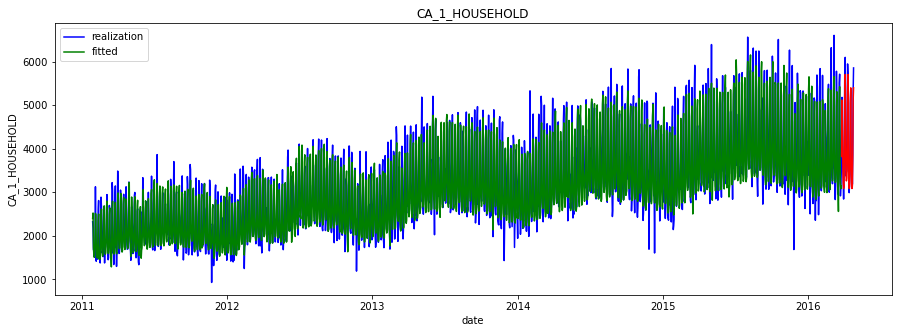

               7          14          21          31
rmse  341.097224  340.691882  307.377846  306.833631
mae   283.467156  289.368988  241.899418  238.829712
r2      0.764160    0.872526    0.907419    0.903276


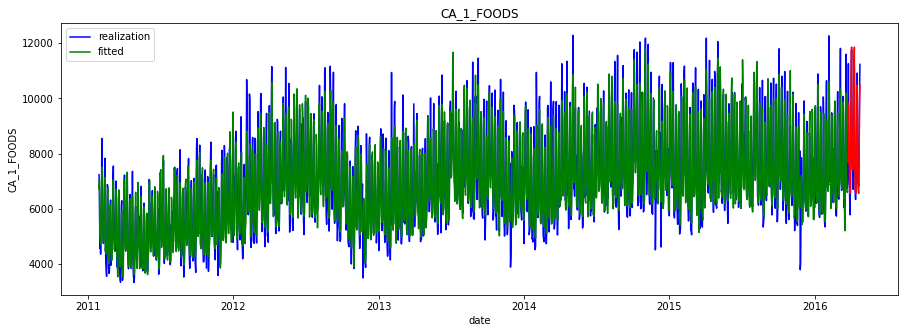

               7          14          21          31
rmse  914.490943  689.394333  593.296893  532.699892
mae   725.117259  479.850963  404.586162  376.951072
r2      0.740295    0.855126    0.896786    0.909756


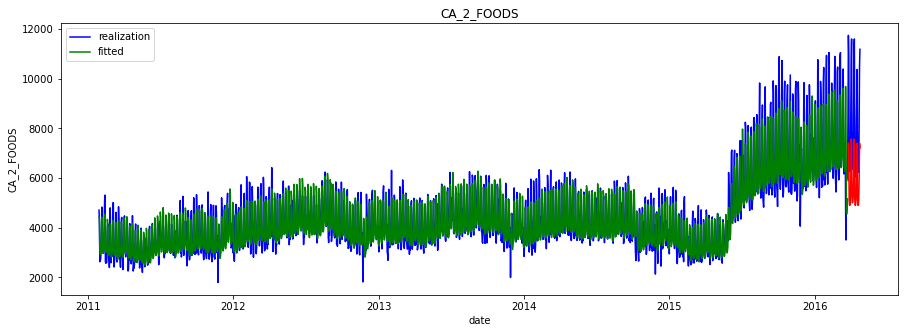

                7           14           21           31
rmse  2708.352607  2658.464746  2635.141295  2576.087307
mae   2414.601864  2430.863709  2396.614946  2368.694609
r2      -0.609514    -0.756140    -0.634973    -0.723236


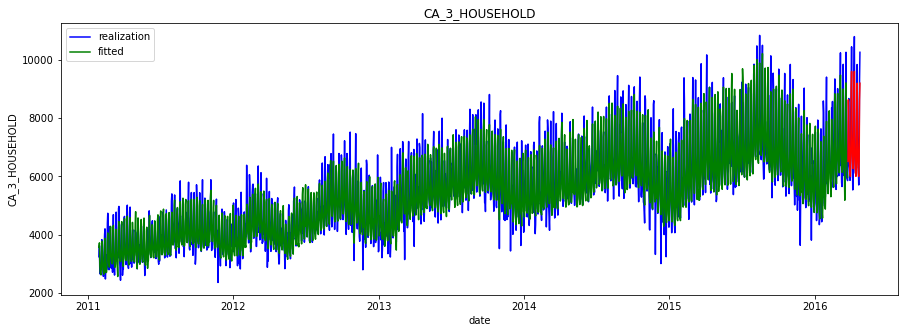

               7          14          21          31
rmse  397.466370  573.699143  563.068978  550.602409
mae   299.261545  392.670487  394.542462  409.748969
r2      0.869380    0.833099    0.859421    0.868899


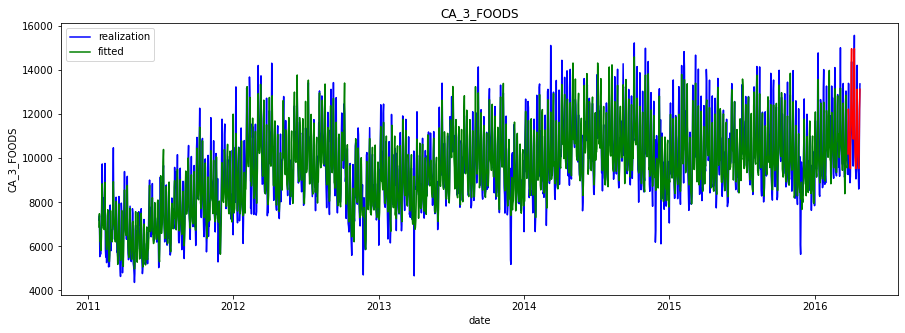

                7           14          21          31
rmse  1108.722063  1045.513590  915.948578  849.153289
mae   1010.799502   928.836328  789.113696  725.848235
r2       0.641540     0.627056    0.763120    0.795257


In [91]:
for i in (2,3,6,8,9):
    #Getting Optimal Parameters of a series
    Par = Optimal_Parameters[str(i)]
    
    #Getting the Series
    series = pd.Series(data.iloc[:, i])
    series.index = data["date"]

    #making the index a datetime variable to identify the month later in model where monthly dummies are included
    series.index = pd.to_datetime(series.index)

    #defining the training and evaluation set
    y = series[:-31]
    y_predict = series[-31:]
    
    
    #calculating the fit values
    fit = fit_extracter(Par, y, exog_to_train)
    #creating a fit series
    fit_values = pd.DataFrame({'fitted' : np.concatenate(fit['point forecast'],axis=None), 'date' : pd.to_datetime(y.index)})
    fit_values = fit_values.set_index('date')
    
    #extracting the last (most recent) values of the states for forecasting
    #reversing the seasonals as the first one input into the forecast function needs to be the oldest seasonality
    l_values = fit['level_list'][len(fit['level_list'])-1:]
    b_values = fit['slope_list'][len(fit['slope_list'])-1:]
    s_values = fit['seasonal_list'][len(fit['seasonal_list'])-7:] #[::-1] #the last command reverses the list
    
    
    #calculating forecasts
    forecast_parameters = np.concatenate([Par[0:4],l_values,b_values,s_values,Par[13:18]], axis=None)
    forecasts = forecasting(forecast_parameters, exog_to_test, 31)
    
    #creating a data frame with the time seires as date objekt and index
    forecasted_values = pd.DataFrame({'forecast' : np.concatenate(forecasts['point forecast'],axis=None), 'date' : pd.to_datetime(y_predict.index)})
    forecasted_values = forecasted_values.set_index('date')
    
    
    #Plotting fitted, forecasted and actual values
    #Plot the results
    graph = plt.figure(figsize=(15, 5))
    plt.plot(series, color= 'blue')
    plt.plot(fit_values, color="green")
    plt.plot(forecasted_values, color="red")
    plt.xlabel("date")
    plt.ylabel(str(data.columns[i]))
    plt.legend(("realization", "fitted"),  
                   loc="upper left")
    plt.title(str(data.columns[i]))
    plt.show()
    
    graph.savefig(str(data.columns[i])+'_plot_'+'.pdf', bbox_inches='tight')
    
    
    #creating a table with the forecasting evaluation metric values for all four models
    #each row contains the evaluation metrics for a model
    #the loop runs threw range of 3 as we have three metrics (0,1,2)
    fc_acc=pd.DataFrame(index=['rmse', 'mae', 'r2'])
    fc_acc["7"] = [eval_metrics(y_predict[:7], forecasted_values['forecast'][:7])[a] for a in range(0,3)]
    fc_acc["14"] = [eval_metrics(y_predict[:14], forecasted_values['forecast'][:14])[a] for a in range(0,3)]
    fc_acc["21"] = [eval_metrics(y_predict[:21], forecasted_values['forecast'][:21])[a] for a in range(0,3)]
    fc_acc["31"] = [eval_metrics(y_predict[:31], forecasted_values['forecast'][:31])[a] for a in range(0,3)]
    
    print(fc_acc)
    
    #saving data as csv
    gfg_csv_data = fc_acc.to_csv(str(data.columns[i])+'_eval_metrics_'+'.csv', index = True) 
    
    

In [ ]:
'''Conclusion: forecast, Optimizations success,
1 bad  CA1 Ho
2 good
3 good
4 bad CA2 Ho
5 bad CA2 HH
6 bad CA2 Fo (structural break)
7 bad CA3 Ho
8 good CA3 HH
9 ok CA3 Fo
10 ok F CA4 Hob
11 bad F CA4 HH
12 bad CA4 Fo
13 bad
14 ok TX1 HH
15 bad TX1 Fo
16 error F
17 error F
18 error F
19 bad
20 bad 
21 bad
22 error F
23 error F
24 error F
25 bad F
26 bad 
27 bad
28 bad
29 bad 
30 bad
'''